# This model is build by Linear Regression

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')


In [41]:
data = pd.read_csv('Dataset/insurance.csv')

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
print(data.sex.value_counts(),'\n',data.children.value_counts(),'\n',data.smoker.value_counts(),'\n',data.region.value_counts(),'\n')

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



In [45]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [46]:
data['smoker'] = data['smoker'].map({'no':0,'yes':1})

In [47]:
data['region'] = data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [48]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


## Exploratory Data Analysis

<Figure size 1300x700 with 0 Axes>

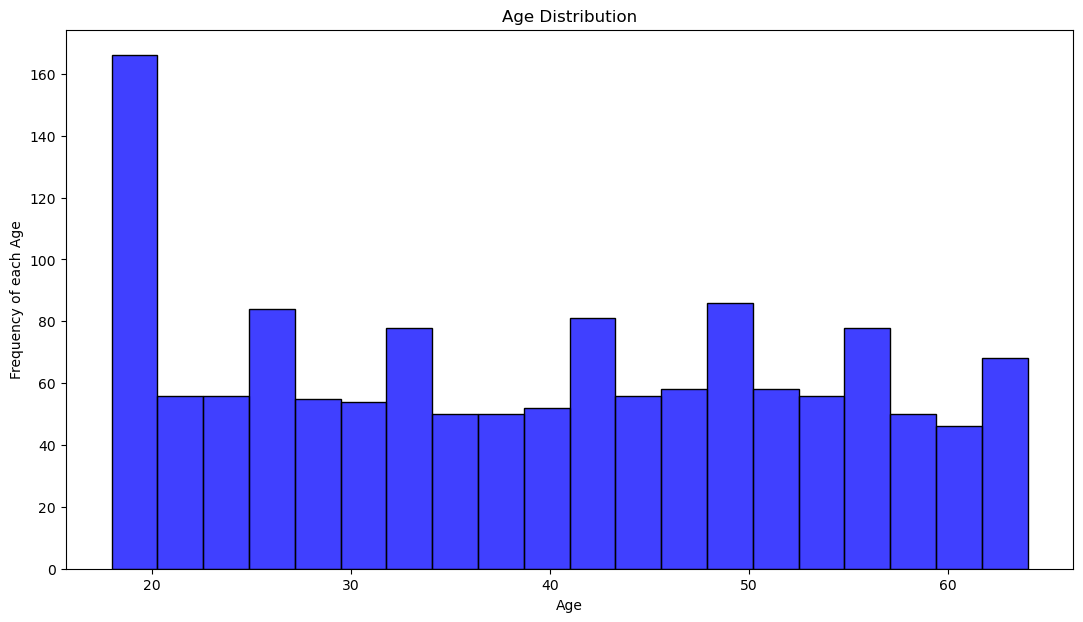

In [49]:
plt.figure(figsize=(13,7))

plt.figure(figsize=(13,7))
sns.histplot(data.age,bins=20,kde=False,color='blue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each Age')
plt.show()

**Maximum people in dataset have a age below 20.**

Text(0.5, 1.0, 'Gender Distribution')

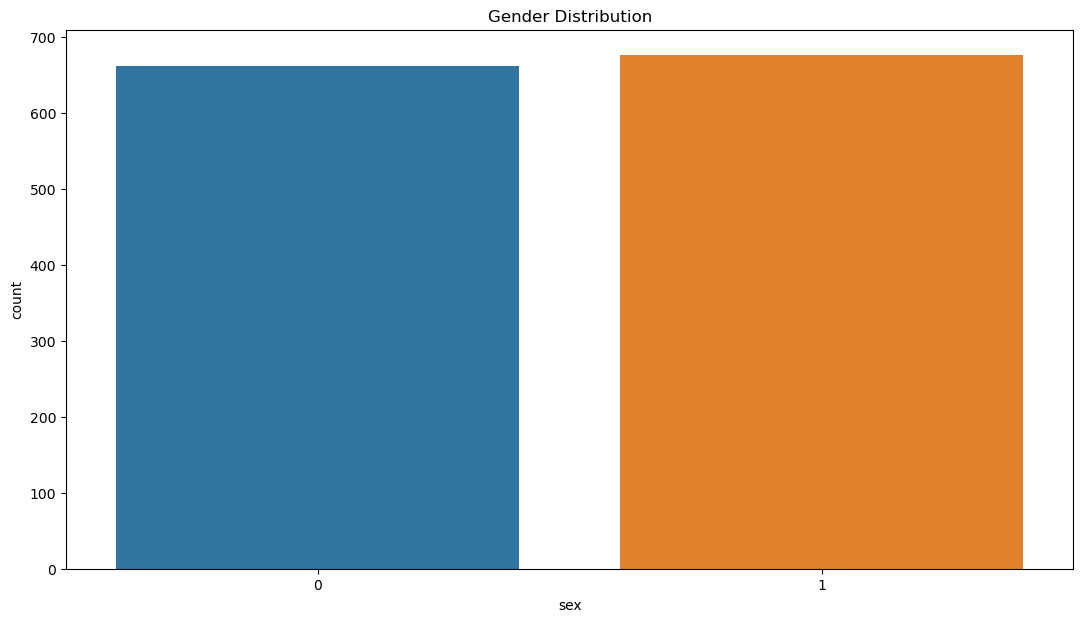

In [50]:
#checking age distribution
plt.figure(figsize=(13,7))
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')

**From above graph the count of male and female is almost similar.**

<Figure size 1300x700 with 0 Axes>

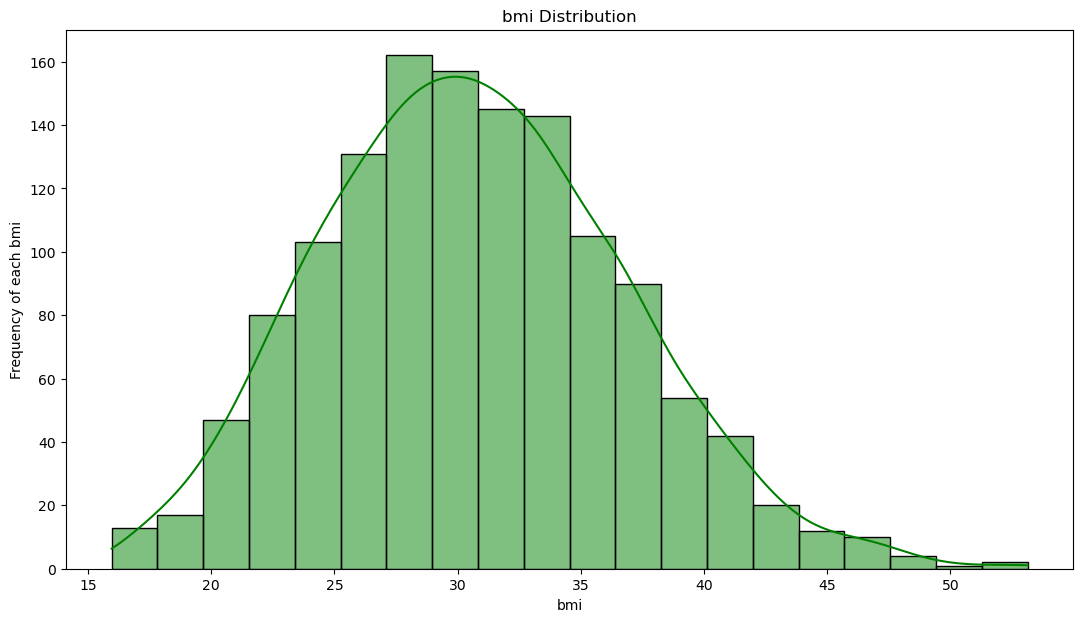

In [51]:
#checking bmi prediction
plt.figure(figsize=(13,7))

plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins=20,kde=True,color='green')

plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency of each bmi')
plt.show()

***The majority of the people have BMI in between 25 and 40, which considered as overweight and could be a major factor in increasing the medical cost.***

### Exploratory Data Analysis

#### Univariate Analysis: ***Analyze one variable at a time***

<Figure size 1300x700 with 0 Axes>

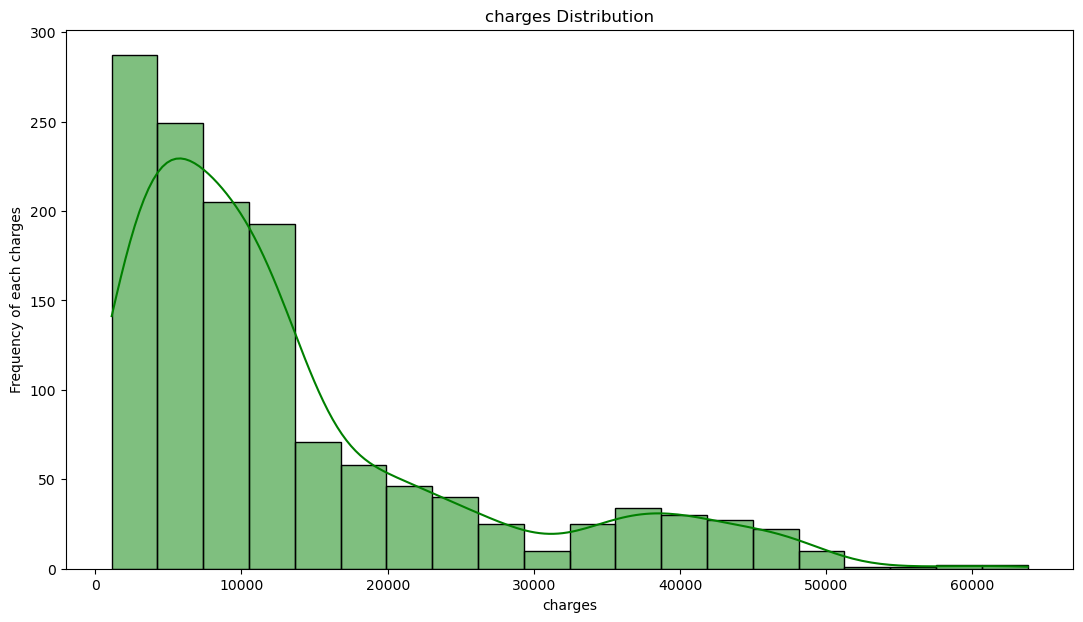

In [52]:
#checking charges prediction
plt.figure(figsize=(13,7))

plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins=20,kde=True,color='green')

plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency of each charges')
plt.show()

***Most of people has insurance charges below 15000 with negligible number of patients having medical expense above 50000.***

### Bivariate Analysis: ***which analyze two variable***

<Figure size 1300x700 with 0 Axes>

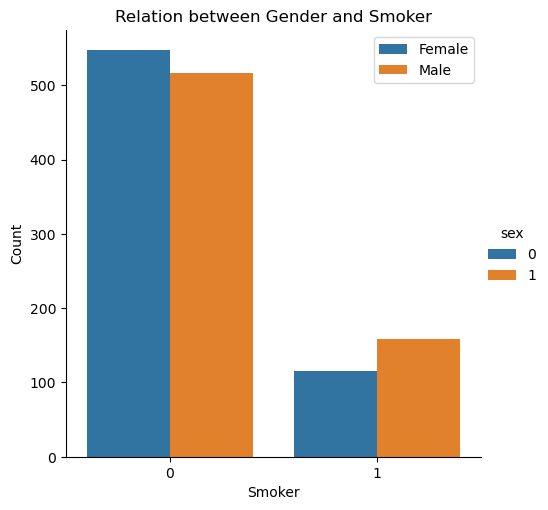

In [53]:
# Relation between Gender and Smoker

plt.figure(figsize=(13,7))
sns.catplot(x='smoker',kind='count',hue='sex',data=data)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Relation between Gender and Smoker')
plt.legend(['Female','Male'])
plt.show()


***We can obeserve that male smokers are more in numbers so i will assume that medical treatment expense for male will be more than female***

<AxesSubplot:title={'center':'box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

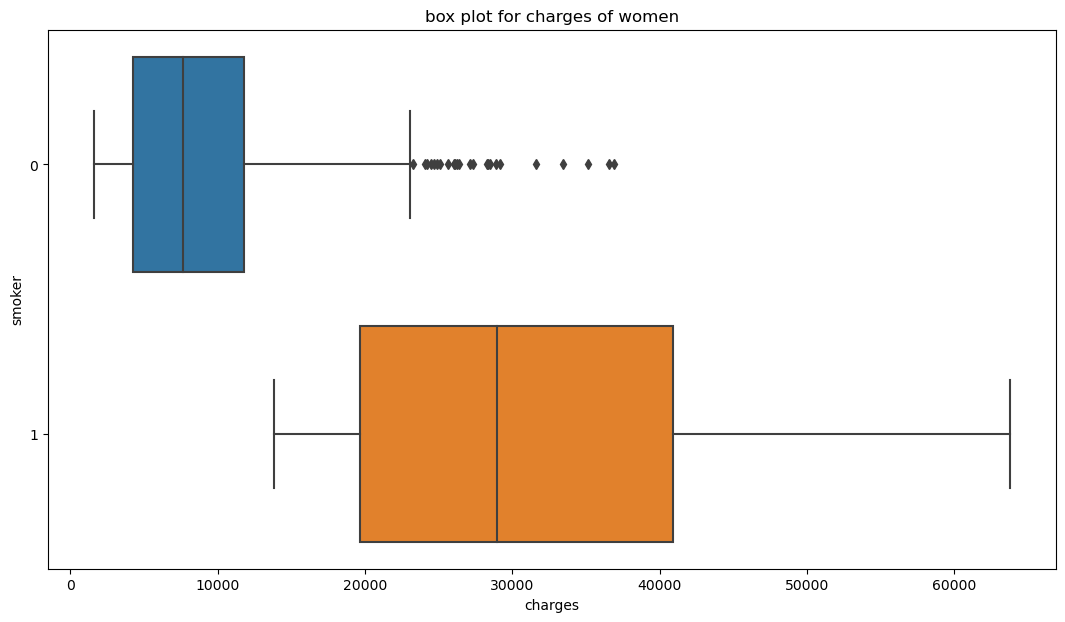

In [54]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h')

<AxesSubplot:title={'center':'box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

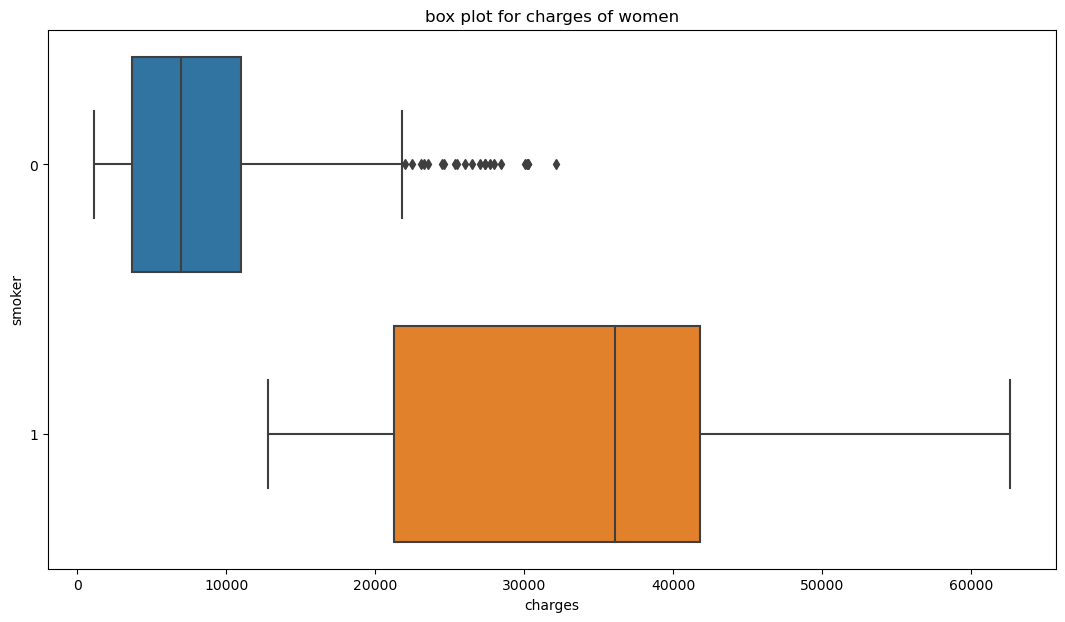

In [55]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h')

***The assumption is true, that the medical expense of males is greater than females. In addition to that medical expenses of smokers is greater that non-smokers.***

In [57]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<AxesSubplot:>

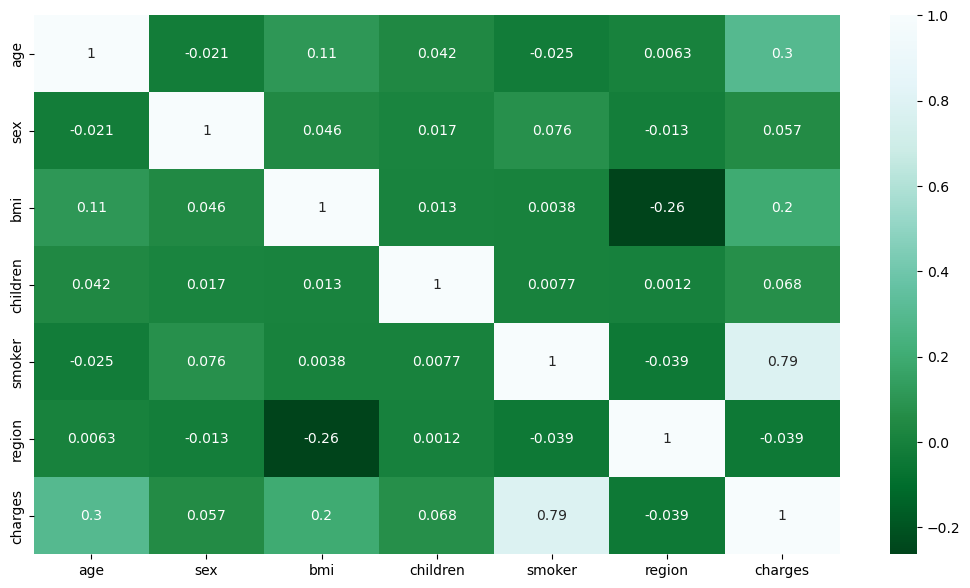

In [58]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

***By observing above plot we can state that smoker has more medical expenses so it has high impact for increasing insurance charge, followed by age and bmi whereas region, sex and children has no impact***

<Figure size 1300x700 with 0 Axes>

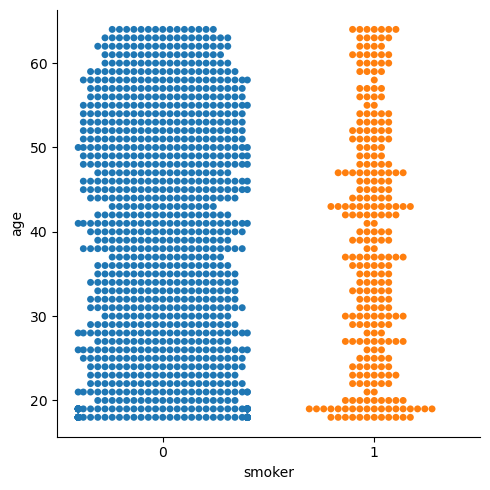

In [59]:
# relation between smokers and age distribution

plt.figure(figsize=(13,7))
sns.catplot(x='smoker',y='age',kind='swarm',data=data)

***From the above graph, we can obeserve that there is significant numbers of smokers at the age 19***

***Multivariate Analysis***

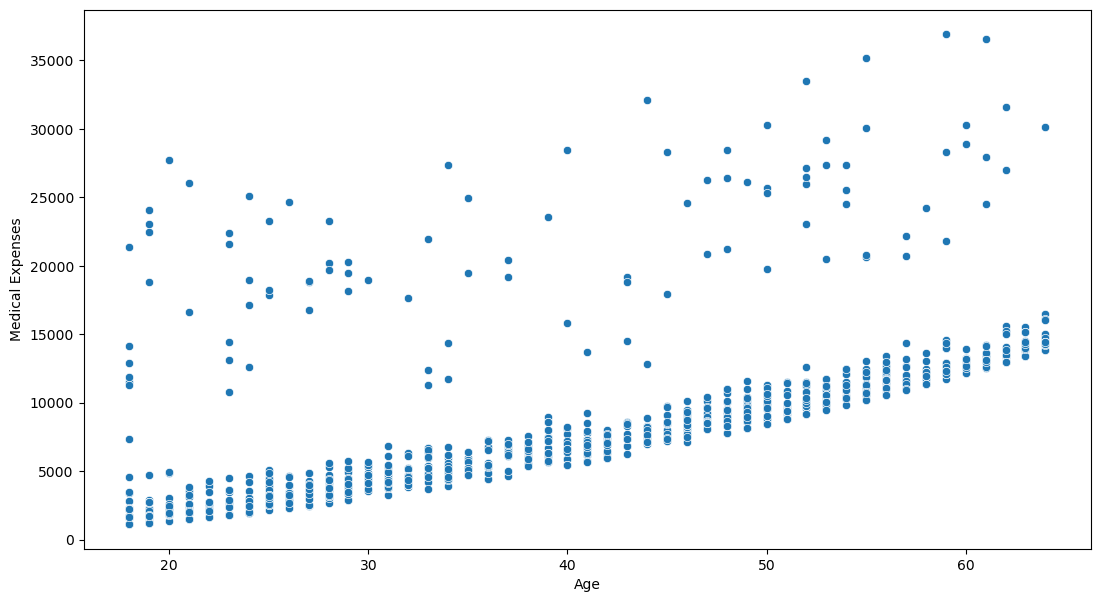

In [60]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data=data[(data.smoker==0)])
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

***Majority of the points shows that medical expenses increases with the age which may due to the fact that older people are more prone to illmess. But thereare some outliers which show other illness or expenses which may lead to increase in medical expenses***

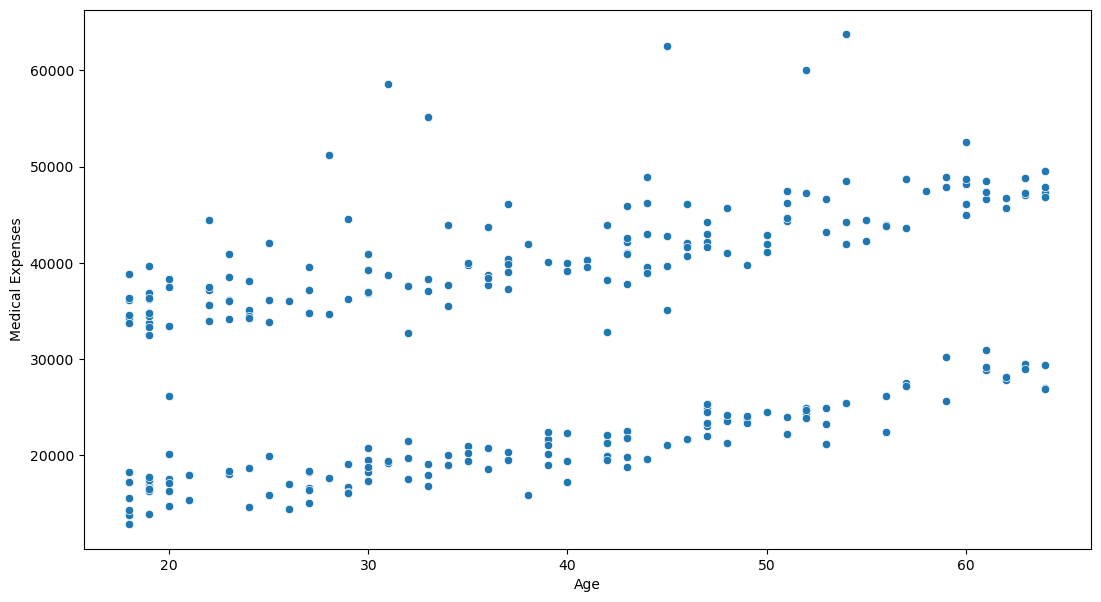

In [61]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data=data[(data.smoker==1)])
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

***In this grapah there are two segments, one with high, medical expense which may due to the smoking related illness and other with low medical expenses which may due to age related illness***

***Now in order to get more we combined both the graphs***

<Figure size 1300x700 with 0 Axes>

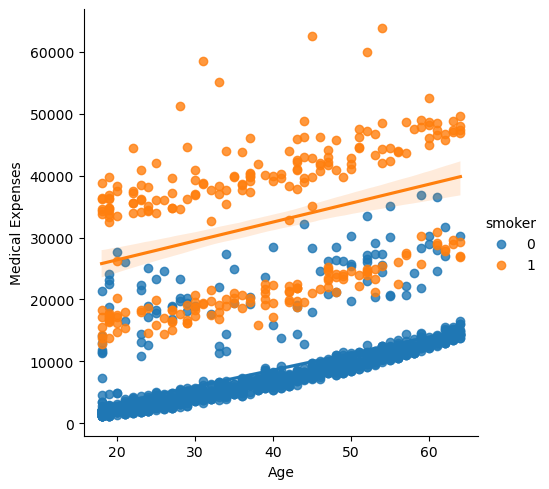

In [62]:
#Age charges Distribution

plt.figure(figsize=(13,7))
sns.lmplot(x='age',y='charges',data=data,hue='smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

***Now we can clearly understand the variation in charges  with respect to age and snoking habits. the medical expense of smokers is heigher than that of non-smokers irrespective of age. in non-smokers, the cost of treatment increases with age which is obvious.***


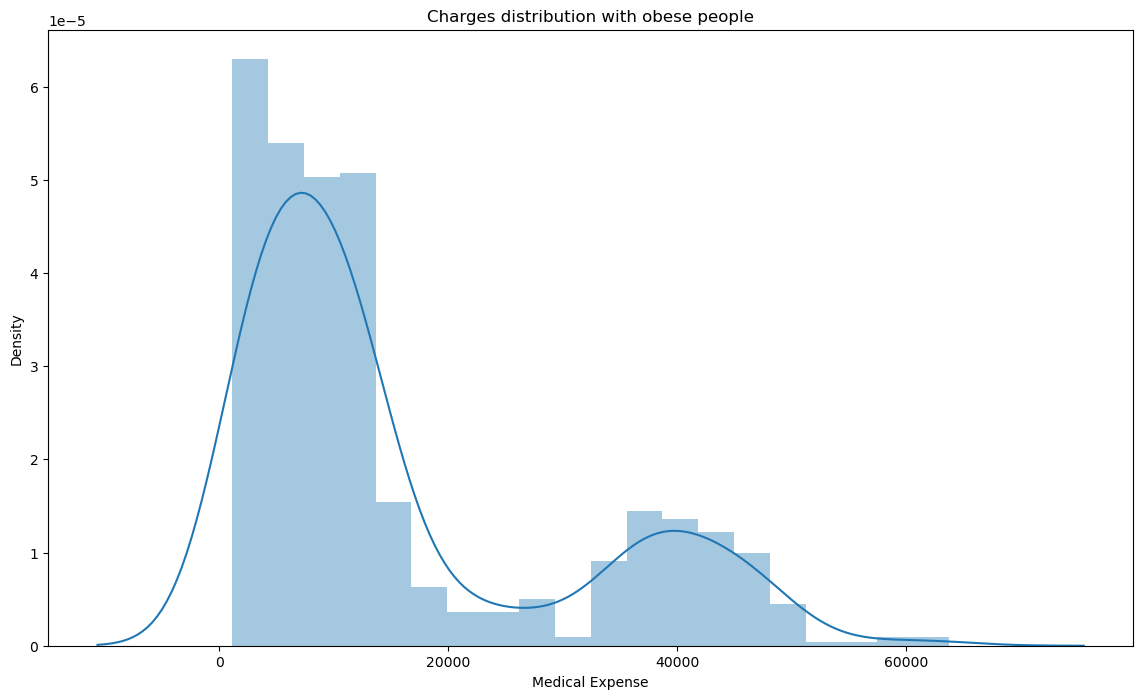

In [63]:
#Realtion between BMI and Medical expenses

plt.figure(figsize=(14,8))
sns.distplot(data[data.bmi>30]['charges'])
plt.title('Charges distribution with obese people')
plt.xlabel('Medical Expense')
plt.show()

***Therefore, people with BMI less than 30 are spending less wheras people with bmi more than 30 are spending more.***

## Data Pre-processing (Splitting)


In [64]:
x = data.drop(['region','charges'], axis = 1)
y = data.charges


In [65]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [67]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1003, 5), (1003,), (335, 5), (335,))

In [68]:
x_train

,age,sex,bmi,children,smoker
612,18,0,33.155,0,0
1093,22,0,30.400,0,1
757,47,0,27.830,0,1
556,46,1,33.440,1,0
829,39,1,21.850,1,0
...,...,...,...,...,...
466,60,0,28.700,1,0
299,48,0,28.880,1,0
493,61,1,43.400,0,0
527,51,0,25.800,1,0


## Model Building & Evaluation

In [69]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 

reg.fit(x_train,y_train)

LinearRegression()

In [70]:
# Making Prediction on test data

y_pred = reg.predict(x_test)

In [71]:
y_pred

array([ 1491.42220463, 11530.99708916,  9953.15126083,  2625.64872608,
        7886.61959339, 11389.85213928,  3289.1365212 ,   830.90363727,
       11996.61326917,  9444.622777  , 11424.51436652,  5344.11854478,
       30332.38835764,    47.66816326, 12346.49961139, 13511.96921128,
        3744.90598392,  7733.09952715, 29643.76515412,  2441.46643487,
       12239.96669177,  2605.07736647, 34418.15239408, 31612.08154637,
       30431.153038  ,  9121.4301058 ,  2051.1961879 , 15432.88409148,
        6780.77559211,  2025.83127279,  9839.84033579,  5646.82422816,
        4798.26066558,  4752.53289034, 10027.5485356 ,  5018.04703758,
       30062.3430807 ,  6870.04490193, 26970.97109402, 14211.76697817,
         258.55513052, 28314.43956471,  7707.63421809,  1805.59316008,
       10663.98993215,  8269.33746924, 11315.18836349,  8416.23328638,
       10960.85209797, 13735.37959521,  5790.44876092,  -507.087304  ,
       26036.96073084, 36551.98205163,  7639.36154535, 17894.25551069,
      

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

MAE: 4180.7864229732395
RMSE: 6159.554567242219
R2 score:  0.7486163979240839


## Polynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [83]:
#transform the features to higher degree
x_train_poly= poly_reg.fit_transform(x_train)

#spliting tha data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.25, random_state=42)

In [85]:
plr=LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred_plr=plr.predict(x_test)

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print('R2 score: ', r2_score(y_test, y_pred_plr))

MAE: 2968.3107439132823
RMSE: 4601.086564017396
R2 score:  0.8422865962496555


##### Result of my model is able to expain 84% for the total data set.

## Predict the Values

In [95]:
age=21
sex=1
bmi=27
children=0
smoker=1

In [96]:
charge=reg.predict([[age,sex,bmi,children,smoker]])
print('The charge for this new patient is {} $'.format(charge[0]))

The charge for this new patient is 25746.780283790074 $
